In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

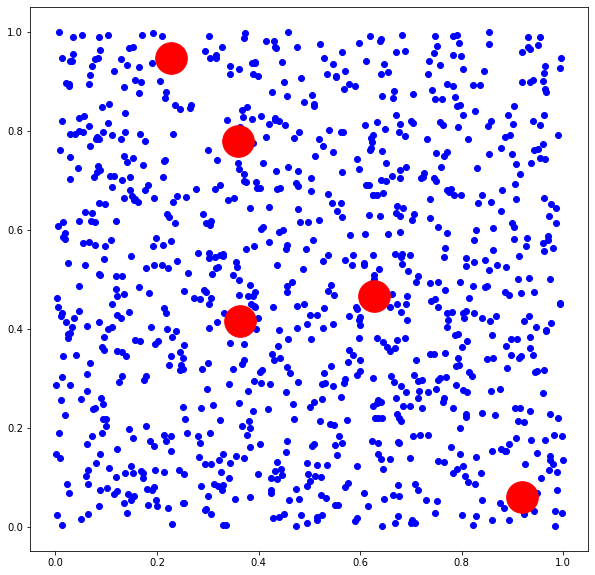

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random


# def init_plants(N):
N = 1000
n = 5
plt.figure(figsize = (10,10))

x = np.random.rand(N)
y = np.random.rand(N)



'''
for i in range(n):
    t = np.random.choice(np.arange(N),1)
    if 
'''

p = np.random.choice(np.arange(N),n)

strong_plants_x = np.array([x[int(i)] for i in p])
strong_plants_y = np.array([y[int(j)] for j in p])

x = np.delete(x,p)
y = np.delete(y,p)




plt.scatter(x,y, c='b')
plt.scatter(strong_plants_x,strong_plants_y, s=1000, c='r')
plt.show()
    
#init_plants(5000)

In [3]:
pt = np.array([x,y])
pt = pt.T
scaler = MinMaxScaler()


In [4]:
def radius_thershold(w=10):
    return w*(10**-3)

def P_w(ra, x, y, strong_plants_x, strong_plants_y, n, N):
    print(f"ra: {ra}")
    p_w = [0.00]* (N-n)
    neighbour_counter = [0] * n
    neighbours = []
    for t in range(n):
        sp = np.array([strong_plants_x[t],strong_plants_y[t]])
        sub_neighbour = []
        sub_n_id = []
        for i in range(N-n):
            wp = np.array([x[i],y[i]])
            length_sp2wp = np.linalg.norm(sp-wp)
            if 0 <= length_sp2wp <= ra:
                sub_neighbour.append(length_sp2wp)
                sub_n_id.append(i)
                p_w[i] = length_sp2wp
                neighbour_counter[t] += 1
        
        neighbours.append(sub_n_id)
        max_length_sp2wp = np.max(sub_neighbour)
        min_length_sp2wp = np.min(sub_neighbour) #np.amin(np.array(p_w)[p_w != np.amin(p_w)])
        print(f"id: {t}")
        print(f'max_length_sp2wp: {max_length_sp2wp}')
        print(f'min_length_sp2wp: {min_length_sp2wp}')
        
        #print(p_w)
        for j in range(len(sub_n_id)):
            i = sub_n_id[j]
            p_w[i] = 1.0 - (sub_neighbour[j] - min_length_sp2wp)/(max_length_sp2wp - min_length_sp2wp)
        
    
    
    #return P_w, s_neighbour
    print(neighbour_counter)
    #print('\n\n\n\n')
    #print(p_w)
    #print(sum(p_w))
    print(neighbours)
    return p_w, neighbour_counter, neighbours
    
ra = radius_thershold(w=100)

p_w, neighbour_counter, neighbours =  P_w(ra, x, y, strong_plants_x, strong_plants_y, n, N)
    



ra: 0.1
id: 0
max_length_sp2wp: 0.09945597420794883
min_length_sp2wp: 0.009884725299012784
id: 1
max_length_sp2wp: 0.09927698062676936
min_length_sp2wp: 0.011045314390505273
id: 2
max_length_sp2wp: 0.09882038248411092
min_length_sp2wp: 0.004598039569863504
id: 3
max_length_sp2wp: 0.09912943654835218
min_length_sp2wp: 0.01002849479069473
id: 4
max_length_sp2wp: 0.09817726992995231
min_length_sp2wp: 0.004549423427294216
[27, 23, 27, 38, 34]
[[32, 77, 85, 113, 116, 119, 277, 301, 305, 308, 330, 347, 356, 373, 401, 420, 450, 466, 468, 570, 609, 749, 790, 832, 845, 903, 935], [34, 196, 232, 259, 274, 296, 398, 405, 451, 527, 536, 563, 610, 655, 657, 674, 693, 740, 803, 825, 887, 910, 970], [7, 47, 57, 69, 70, 80, 89, 107, 174, 181, 224, 260, 282, 297, 300, 323, 360, 368, 523, 607, 666, 670, 839, 857, 932, 941, 985], [6, 29, 44, 55, 62, 105, 138, 155, 157, 203, 205, 233, 281, 304, 317, 324, 432, 437, 461, 464, 511, 512, 518, 539, 547, 556, 585, 594, 605, 642, 684, 695, 753, 783, 881, 907, 91

In [5]:
def update_P_s(current_counter, init_counter):
    a = 0.03
    p_s = [0.0]*len(init_counter)
    for t in range(len(init_counter)):
        
        p_s[t] = a * np.abs(1.0 - current_counter[t]/init_counter[t])
    return p_s

p_s = update_P_s(neighbour_counter, neighbour_counter)
p_s

[0.0, 0.0, 0.0, 0.0, 0.0]

<ipython-input-6-57ae961c128a>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  neighbours = np.array(neighbours)


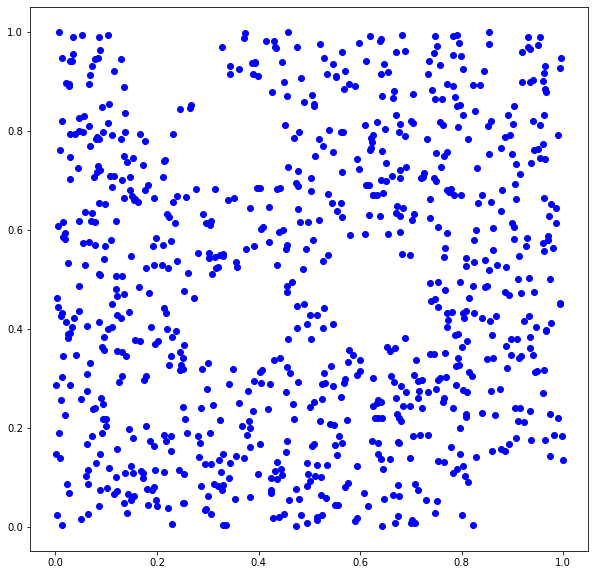

In [6]:


iteration = 200
died_weak_plants = []
died_strong_plants = []
#current_counter = neighbour_counter.copy()
#print(p_w)
neighbours = np.array(neighbours)
for t in range(iteration):
    output_x = x.copy()
    output_y = y.copy()
    
    for i in range(N-n):
        
        if p_w[i] != 0.0:
            
            if 0 <= random.uniform(0,1) <= p_w[i]:
                p_w[i] = 0.0
                died_weak_plants.append(i)
                for j in range(len(neighbours)):
                    
                    if i in neighbours[j]:
                        neighbours[j] = np.delete(neighbours[j],np.where(i == neighbours[j]))
                        
                        
                        
                
                #x[i] = -1.0
                #y[i] = -1.0
                
            
    
    
    output_x = np.delete(x.copy(),died_weak_plants)
    output_y = np.delete(y.copy(),died_weak_plants)
    #print(died_plants)
    current_counter = [i.shape[0] for i in neighbours]
    #print(neighbours)
    #print(current_counter)
    p_s = update_P_s(current_counter, neighbour_counter)
    #print(p_s)
    
    for i in range(n):
        if current_counter[i] != 0.0:
            if 0 <= random.uniform(0,1) <= p_s[i]:
                current_counter[i] = 0.0
                #print(i)
                died_strong_plants.append(i)
    #print(died_strong_plants)          
    output_strong_plants_x = np.delete(strong_plants_x.copy(),died_strong_plants)
    output_strong_plants_y = np.delete(strong_plants_y.copy(),died_strong_plants)
    
    plt.figure(figsize = (10,10))
    plt.scatter(output_x,output_y, c='b')
    plt.scatter(output_strong_plants_x,output_strong_plants_y, s=1000, c='r')
    plt.savefig('output_200/frame%d.jpg'%t)
    plt.close()
    
    if t == iteration - 1:

        plt.figure(figsize = (10,10))
        plt.scatter(output_x,output_y, c='b')
        plt.scatter(output_strong_plants_x,output_strong_plants_y, s=1000, c='r')
        plt.show()
    




